<a href="https://colab.research.google.com/github/samueljos3/ProjetoHeartDisease/blob/main/Relat%C3%B3rioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RELATÓRIO DO PROJETO FINAL - ICD
- SAMUEL JOSÉ
- ERLON LACERDA
- ROBERTO RAWLISON
- LEO JAIME

base de dados: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

#MOTIVAÇÃO:
Nossa motivação para a escolha do tema foi a capacidade do mesmo ser abrangente e complexo. Dados da saúde são mais peculiares de tratar e avaliar já que diversas coisas se relacionam entre si e casos aleatórios não previstos podem ocorrer com frequência. Além disso, houve uma curiosidade sobre os dados em si: "O que podemos aprender sobre a saúde com eles? Podemos descobrir novas coisas?".

#OBJETIVO:
- Entender como as variáveis se interagem;
- Tirar conclusões que casam com estudos na área;
- Descobrir como a saúde, ou a falta dela, pode ter relação com doenças e problemas cardíacos;
- Aplicar, após os estudos, soluções que possam auxiliar na predição e no diagnóstico de problemas cardíacos.



# HEART DISEASE




## Importando bibliotecas e dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
df = pd.read_csv("https://raw.githubusercontent.com/erlonL/Projeto-ICD/main/heart-disease.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Tratamento e manipulação dos dados

In [2]:
df = df.dropna() # retirando possíveis elementos NaN/Na

In [3]:
df['AgeCategory'] = df['AgeCategory'].str.slice(stop=2).astype(int)

In [4]:
# Criando colunas numéricas com valores binários para realizar manipulações gráficas melhores
df['HeartDiseaseNUM'] = df['HeartDisease'].replace({"Yes": 1.0, "No": 0.0})
df['SmokingNUM'] = df['Smoking'].replace({"Yes": 1.0, "No": 0.0})
df['AlcoholDrinkingNUM'] = df['AlcoholDrinking'].replace({"Yes": 1.0, "No": 0.0})
df['StrokeNUM'] = df['Stroke'].replace({"Yes": 1.0, "No": 0.0})
df['DiffWalkingNUM'] = df['DiffWalking'].replace({"Yes": 1.0, "No": 0.0})
df['PhysicalActivityNUM'] = df['PhysicalActivity'].replace({"Yes": 1.0, "No": 0.0})
df['AsthmaNUM'] = df['Asthma'].replace({"Yes": 1.0, "No": 0.0})
df['KidneyDiseaseNUM'] = df['KidneyDisease'].replace({"Yes": 1.0, "No": 0.0})
df['SkinCancerNUM'] = df['SkinCancer'].replace({"Yes": 1.0, "No": 0.0})

# A coluna "Diabetic" possui valores diferentes das outras, assumimos que
#"No, borderline diabetes" vale 0.0 e "Yes (during pregnancy)" vale 1.0
df['DiabeticNUM'] = df['Diabetic'].replace({"Yes": 1.0, "No": 0.0, "No, borderline diabetes": 0.0, "Yes (during pregnancy)": 1.0})

# criando uma nova coluna numérica baseada nos valores de GenHealth
# A nova coluna GenHealthNUM segue uma ordem de classificação, em que 1 é a pior saúde geral e 5 a melhor
df['GenHealthNUM'] = df['GenHealth'].replace({"Poor": 1.0, "Fair": 2.0, "Good": 3.0, "Very good": 4.0, "Excellent": 5.0})

In [5]:
def classifica_imc(valor_coluna):
  if valor_coluna < 18.5:
    valor_coluna = "Abaixo do Peso"
  elif valor_coluna < 25:
    valor_coluna = "Peso Ideal"
  elif valor_coluna < 30:
    valor_coluna = "Acima do Peso"
  elif valor_coluna < 35:
    valor_coluna = "Obesidade Grau I"
  elif valor_coluna < 40:
    valor_coluna = "Obesidade Grau II"
  else:
    valor_coluna = "Obesidade Grau III"
  return valor_coluna

def classifica_imc_num(valor_coluna):
  if valor_coluna < 18.5:
    valor_coluna = 1
  elif valor_coluna < 25:
    valor_coluna = 2
  elif valor_coluna < 30:
    valor_coluna = 3
  elif valor_coluna < 35:
    valor_coluna = 4
  elif valor_coluna < 40:
    valor_coluna = 5
  else:
    valor_coluna = 6
  return valor_coluna

# Criando colunas do BMI de acordo com a classificação de peso
df["BMI_Classification"] = df["BMI"].apply(classifica_imc)
df["BMI_Classification_NUM"] = df["BMI"].apply(classifica_imc_num)

In [6]:
# criando df quase todo numerico para possível uso no futuro

df_n = df.copy()

def troca_por_binario(valor_coluna):
  if valor_coluna == "Yes":
    valor_coluna = 1
  elif valor_coluna == "No":
    valor_coluna = 0
  elif valor_coluna == "No, borderline diabetes":
    valor_coluna = 0
  elif valor_coluna == "Yes (during pregnancy)":
    valor_coluna = 1
  return valor_coluna

df_numeric = df.select_dtypes(include='number')

for coluna in df_n.columns:
    if coluna not in df_numeric.columns:
      df_n[coluna] = df_n[coluna].apply(troca_por_binario)

#PERGUNTAS:
- COMO AS VARIÁVEIS INFLUENCIAM NUMA DOENÇA CARDÍACA?
- COMO A RAÇA E O SEXO PODEM INFLUÊNCIAR NOS PROBLEMAS CARDÍACOS?
- COMO OS HABITOS E FATORES NÃO CONTROLÁVEIS INFLUENCIAM NUMA DOENÇA CARDÍACA?
- COMO O SONO IMPACTA NA SAÚDE DO INDIVÍDUO?

## Exploração inicial com boxplot

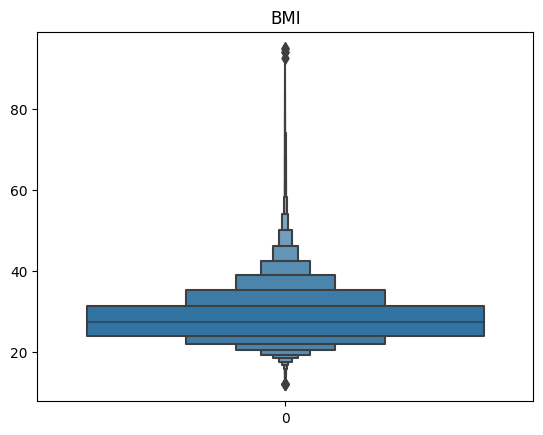

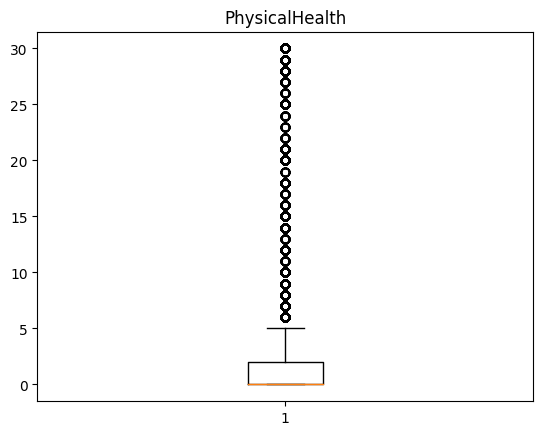

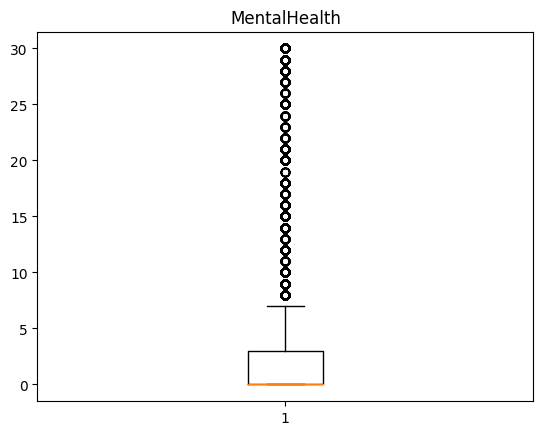

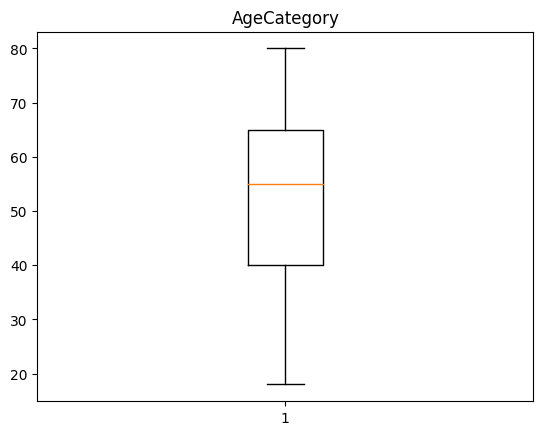

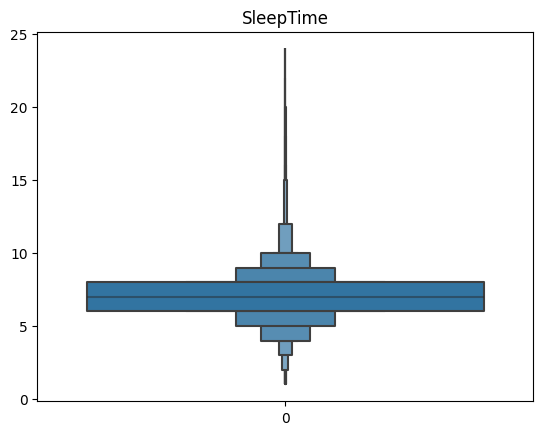

In [7]:
# selecionando apenas as colunas numéricas e não binárias para realizar o boxplot e boxenplot
df2 = df.select_dtypes(include='number')

for coluna in df2.columns:

  if 'NUM' not in coluna and 'num' not in coluna:
    if coluna != 'BMI' and coluna != 'SleepTime':
      plt.boxplot(df2[coluna])
      plt.title(coluna)
      plt.show()
    else:
      sns.boxenplot(df2[coluna])
      plt.title(coluna)
      plt.show()


## Gráficos

### Avaliando a frequência dos dados

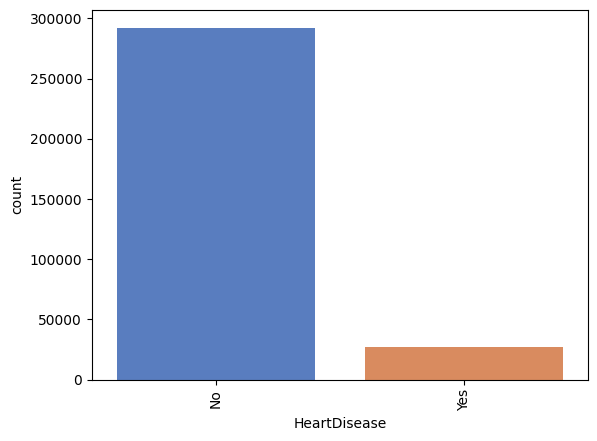

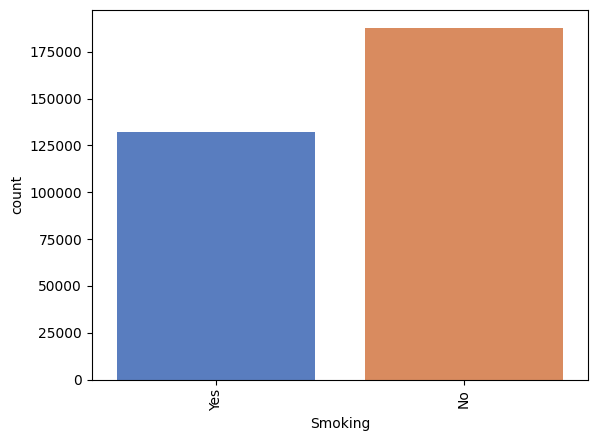

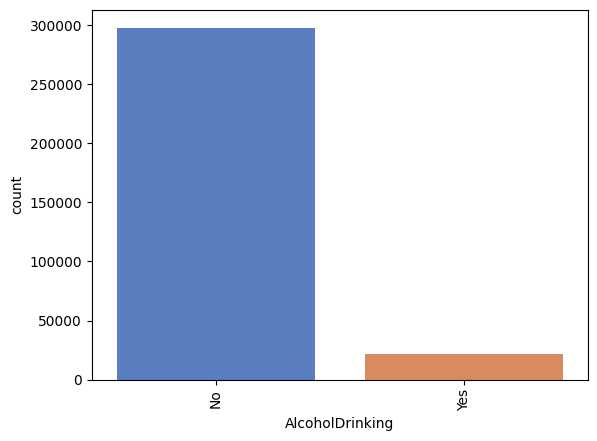

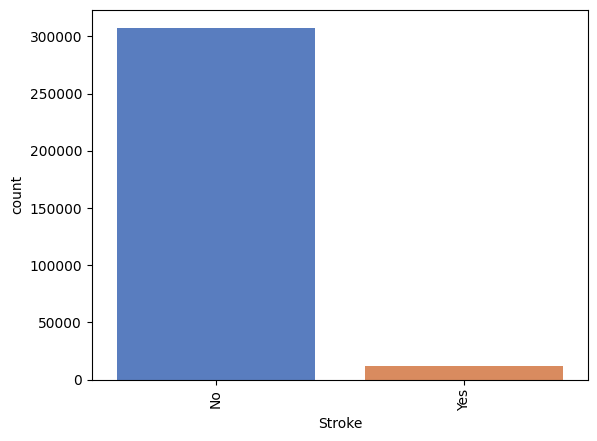

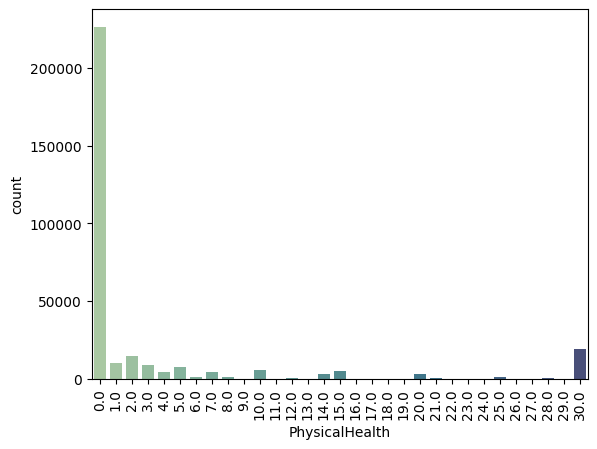

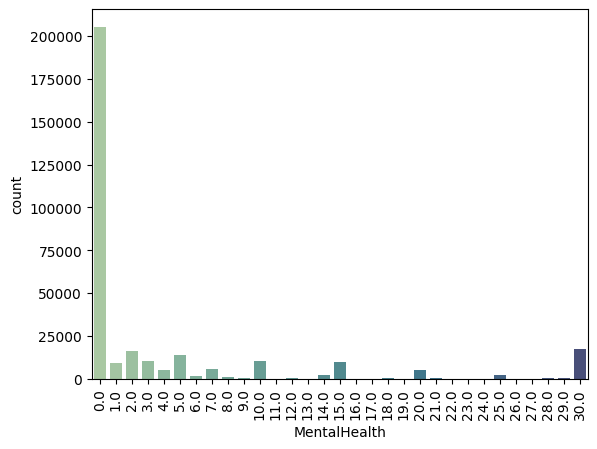

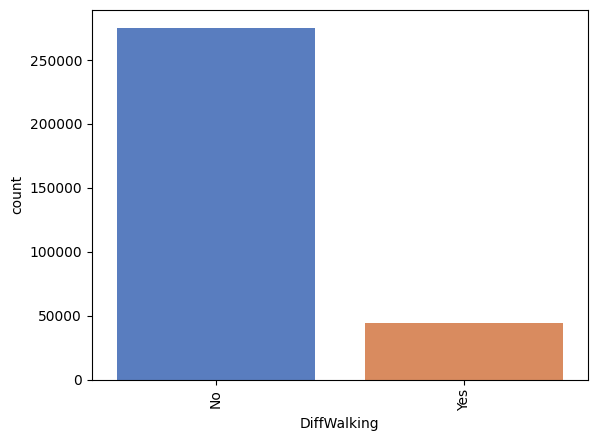

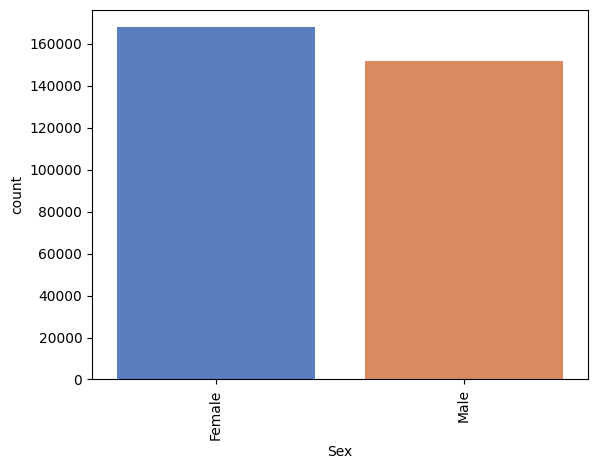

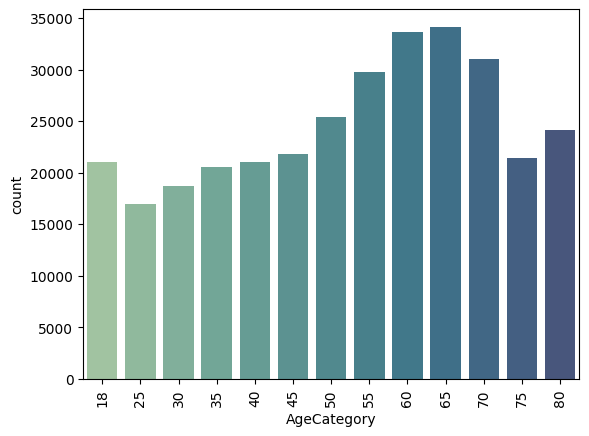

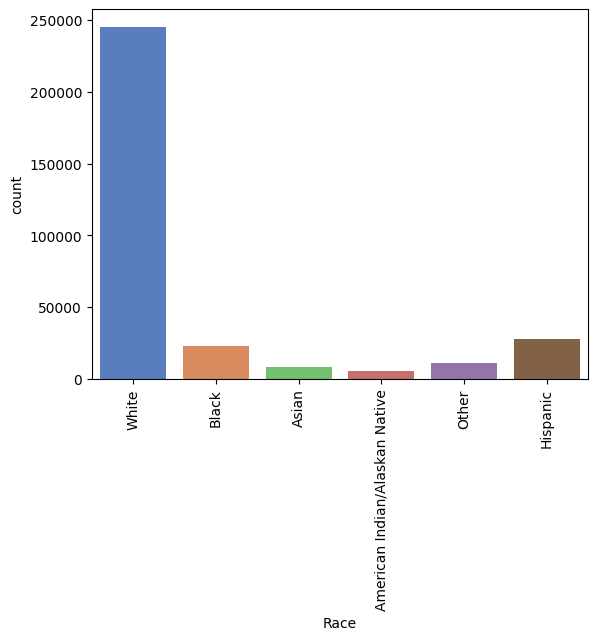

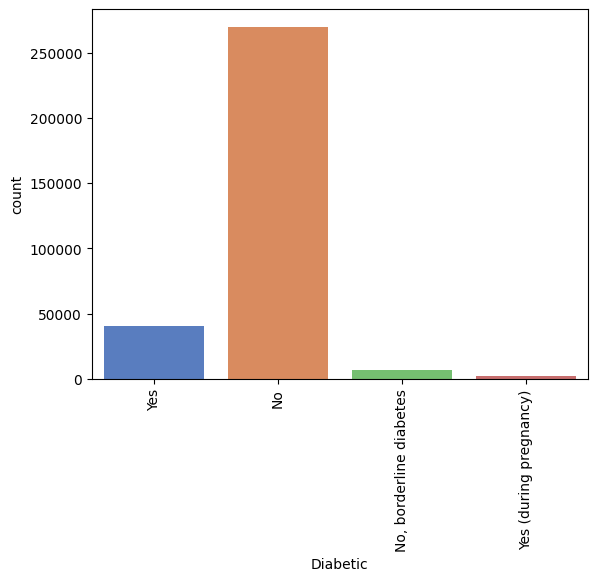

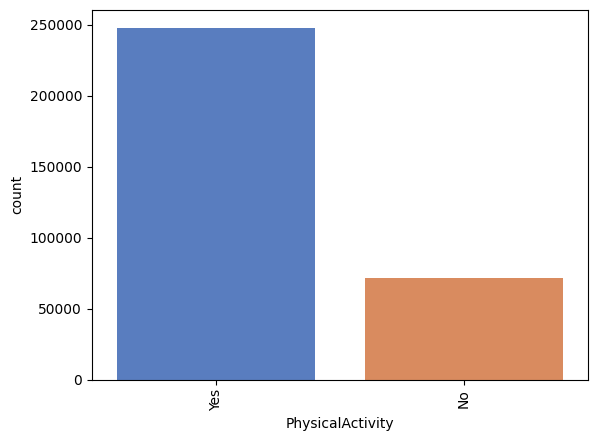

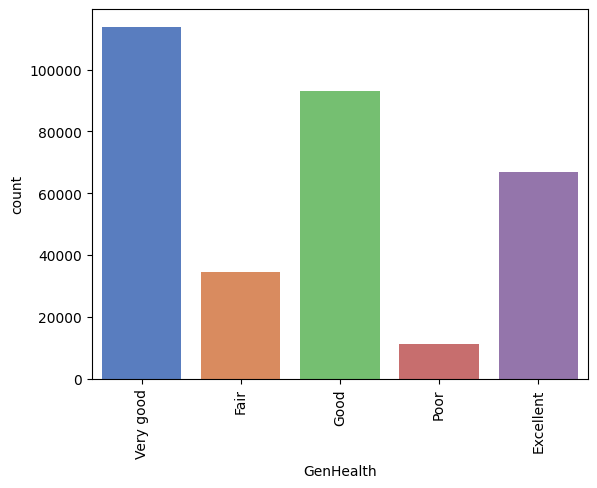

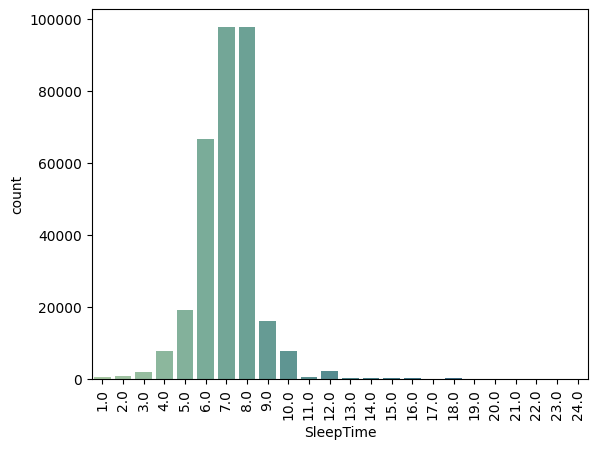

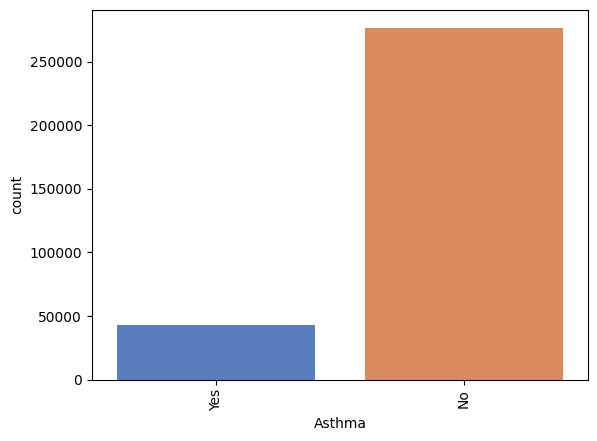

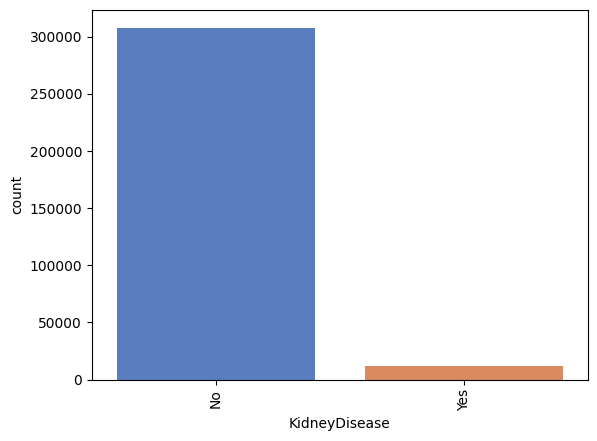

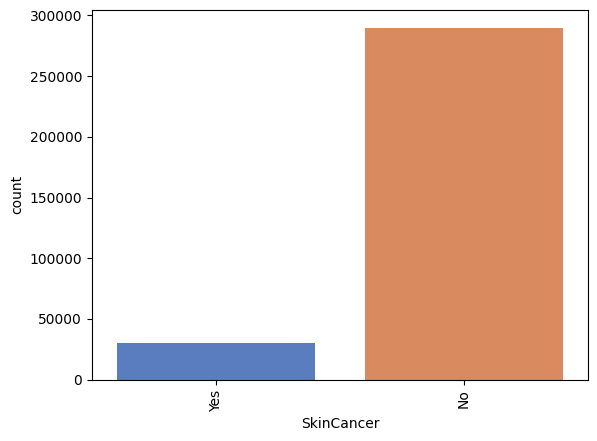

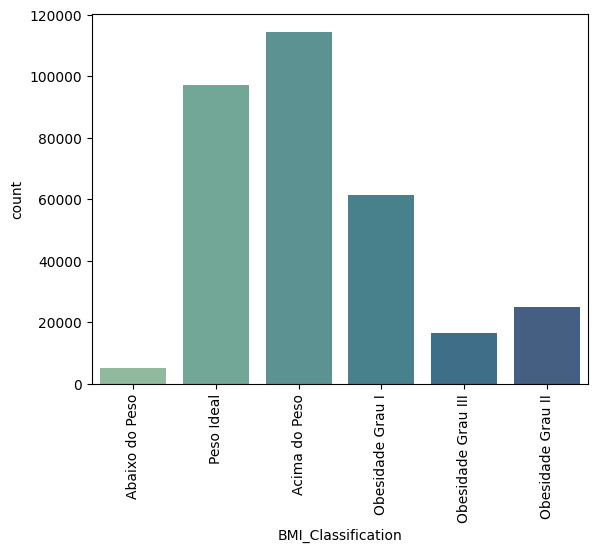

In [8]:
for i in df:
  if 'NUM' not in i and 'num' not in i and i != 'BMI':
    coluna = df[i]
    if i != 'BMI_Classification' and i != 'SleepTimeCat' and i != 'SleepTime' and i != 'AgeCategory' and i != 'MentalHealth' and i != 'PhysicalHealth':
      sns.countplot(data = df, x = coluna, palette = 'muted')
      plt.xticks(rotation=90)
      plt.show()
    else:
      sns.countplot(data = df, x = coluna, palette = 'crest', alpha = 0.9)
      plt.xticks(rotation=90)
      plt.show()


### verificando relações

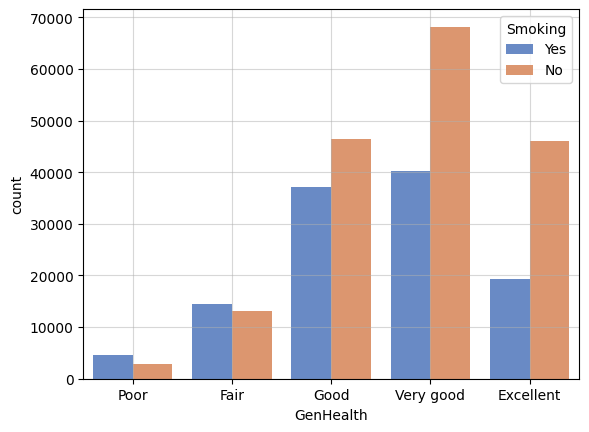

In [9]:
# Relação de saúde geral com o ato de fumar (utlizando pessoas que não tiveram problemas no coração)

sns.countplot(data = df.loc[df['HeartDisease'] == 'No'], x = "GenHealth", hue = 'Smoking', alpha = 0.9, palette = "muted", order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.grid(True, alpha = 0.5)
plt.show()

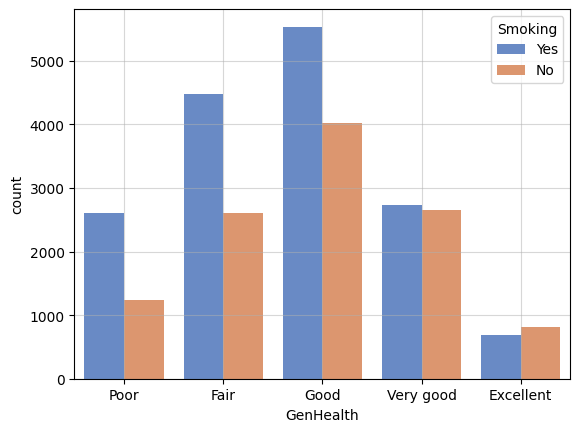

In [10]:
# Relação de saúde geral com o ato de fumar (utlizando pessoas que tiveram problemas no coração)

sns.countplot(data = df.loc[df['HeartDisease'] == 'Yes'], x = "GenHealth", hue = 'Smoking', palette = 'muted', alpha = 0.9, order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
sns.set_style("ticks")
plt.grid(True, alpha = 0.5)
plt.show()

O gráfico demonstra que a proporção de fumantes em pessoas com saúde geral boa são bem menores quando comparada com saúde geral ruim, demonstrando que o ato de fumar pode ser bem impactante na saúde geral.

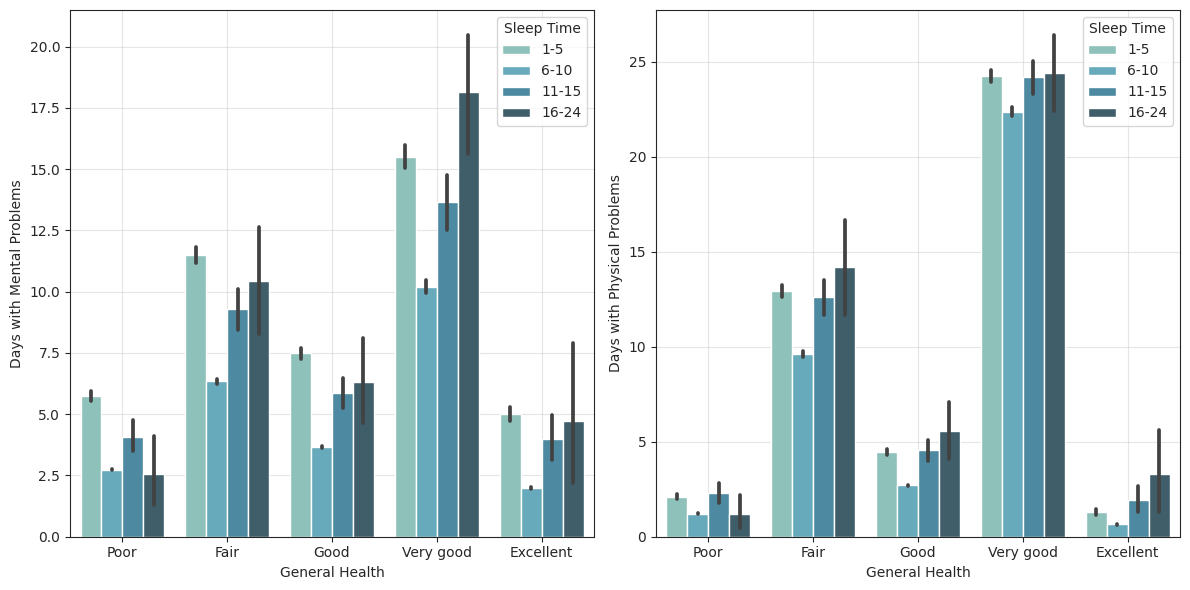

In [11]:
bins = [1, 5, 10, 15, 24]
labels = ['1-5', '6-10', '11-15', '16-24']
df['SleepTimeCat'] = pd.cut(df['SleepTime'], bins=bins, labels=labels)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

sns.barplot(data=df, x="GenHealth", y="MentalHealth", hue="SleepTimeCat", alpha=1, palette="GnBu_d", ax=ax1)
ax1.legend(title="Sleep Time")
ax1.set_xlabel("General Health")
ax1.set_ylabel("Days with Mental Problems")

ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])
ax1.grid(True, alpha=0.5)

sns.barplot(data=df, x="GenHealth", y="PhysicalHealth", hue="SleepTimeCat", palette="GnBu_d", ax=ax2)
ax2.legend(title="Sleep Time")
ax2.set_xlabel("General Health")
ax2.set_ylabel("Days with Physical Problems")

ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])
ax2.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Nesse comparativo de gráfico, é possível identificar que as pessoas que dormem entre 6 e 10 horas possuem menor incidência problemas físicos e mentais em todos os comparativos de General Health.
Além disso, é possível ver que os extremos de sono (muitas horas de sono e poucas horas) proporcionam um aumento nos índices de problemas físicos e mentais (ou vice-versa, ainda não é possível definir).


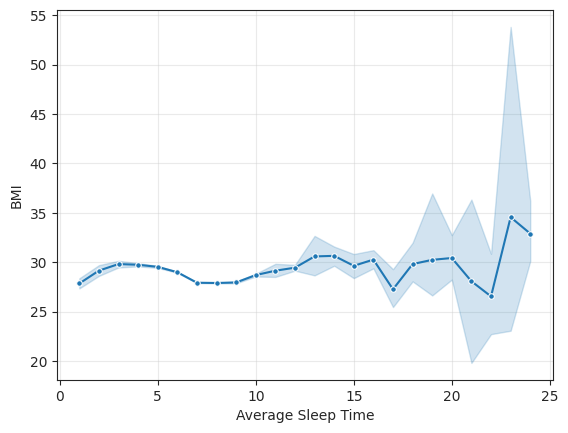

In [12]:
sns.lineplot(data = df_numeric, x = "SleepTime", y = "BMI", marker='o', markersize = 4)
plt.xlabel("Average Sleep Time")
plt.grid(True, alpha=0.4)
plt.show()

O gráfico demonstra que quanto maior o tempo dormido, maior a variação do BMI.
Também demonstrando que o período em torno de 7 e 9 horas é marcado por um BMI baixo e mais constante, também apresentando poucas dispersões.

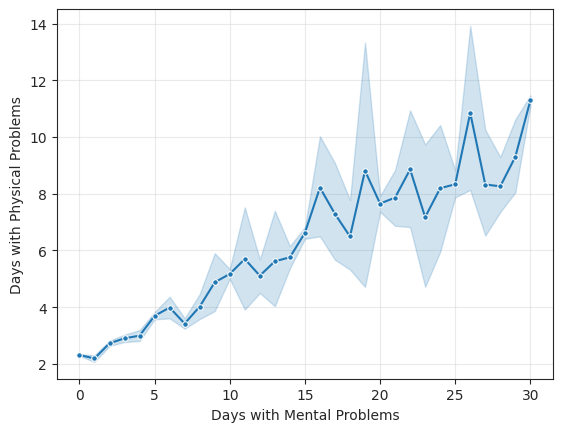

In [13]:
sns.lineplot(data = df_numeric, x = "MentalHealth", y = "PhysicalHealth", marker = 'o', markersize = 4)
plt.xlabel("Days with Mental Problems")
plt.ylabel("Days with Physical Problems")
plt.grid(True, alpha=0.4)
plt.show()

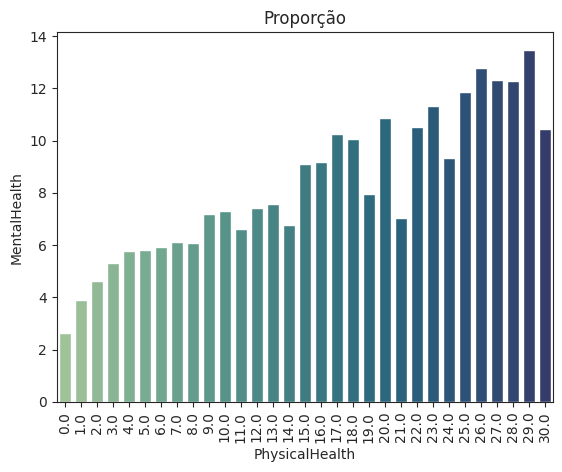

In [14]:
proporcao = df.groupby('PhysicalHealth')['MentalHealth'].mean()
sns.barplot(data = proporcao.reset_index(), x = 'PhysicalHealth', y = 'MentalHealth', palette = 'crest')
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()


Aqui percebe-se uma relação entre os dias com problemas de saúde física e mental, quanto maior um, maior o outro.

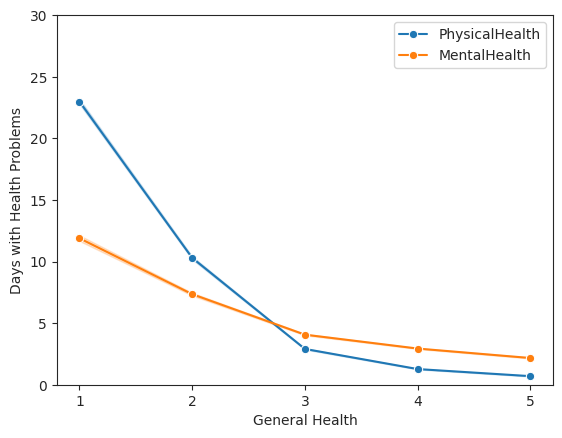

In [15]:
sns.lineplot(data = df_numeric, x = "GenHealthNUM", y = "PhysicalHealth", label = 'PhysicalHealth', marker = 'o')
sns.lineplot(data = df_numeric, x = "GenHealthNUM", y = "MentalHealth", label = 'MentalHealth', marker = 'o')

plt.ylabel("Days with Health Problems")
plt.xlabel("General Health")
plt.ylim([0, 30])

# define os ticks do eixo x (não tem valores 1.5, 2.5,...)
# e os labels para 1, 2, 3, 4, 5 conforme os dados
plt.xticks([1, 2, 3, 4, 5])
plt.show()

Pode-se perceber que quanto maior os dias com problemas de saúde, pior vai ser a saúde geral. Também percebe-se que a saúde física tem um maior impacto na saúde geral do que a mental, pois a curva para 'PhysicalHealth' é maior.

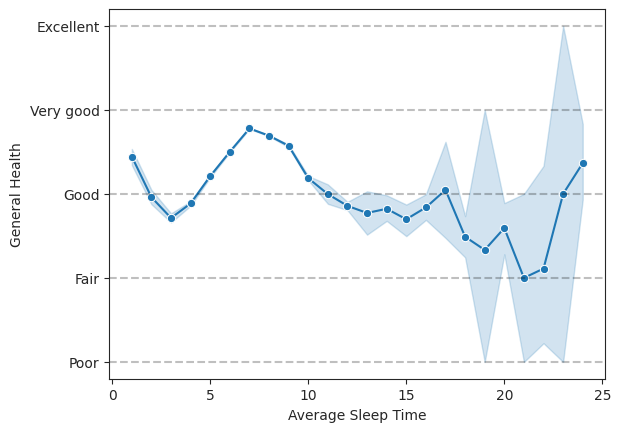

In [16]:
sns.lineplot(data = df_numeric, x = "SleepTime", y = "GenHealthNUM", marker='o')

# define os ticks do eixo x (não tem valores 1.5, 2.5,...)
# e os labels para 1, 2, 3, 4, 5 conforme os dados
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.yticks([1, 2, 3, 4, 5], xtick_labels)

plt.ylabel("General Health")
plt.xlabel("Average Sleep Time")

# define as posições das linhas pontilhadas
for i in range(1, 6):
    plt.axhline(y=i, linestyle='--', color='black', alpha = 0.25)

plt.show()

As pessoas que dormem entre 5 e 10 horas por dia tem as melhores saúdes gerais. Mais especificamente, as que dormem 7 horas por dia, tem o melhor índice de saúde geral.

O gráfico demonstra a possível relação: As pessoas que não fazem atividade física regularmente têm períodos maiores de dias com problemas de saúde física.

In [17]:
# Essa coluna possui valores diferentes das outras, assumimos que
#"No, borderline diabetes" vale 0.0 e "Yes (during pregnancy)" vale 1.0

df['DiabeticNUM'] = df['Diabetic'].replace({"Yes": 1.0, "No": 0.0, "No, borderline diabetes": 0.0, "Yes (during pregnancy)": 1.0})

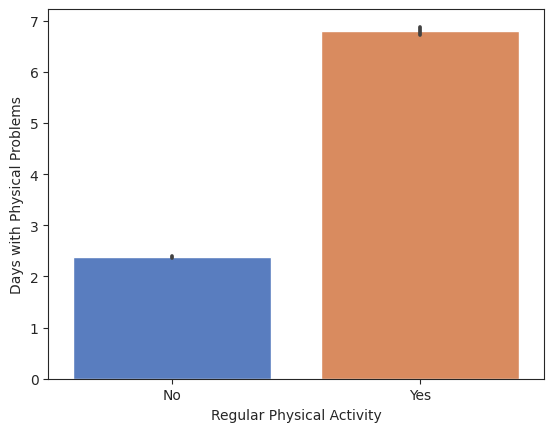

In [18]:
sns.barplot(data = df, x = "PhysicalActivity", y = "PhysicalHealth", palette = 'muted')

plt.xticks([0.0, 1.0],["No", "Yes"]) # Mostra 0 como 'No' e 1 como 'Yes'
plt.xlabel("Regular Physical Activity")
plt.ylabel("Days with Physical Problems")

plt.show()

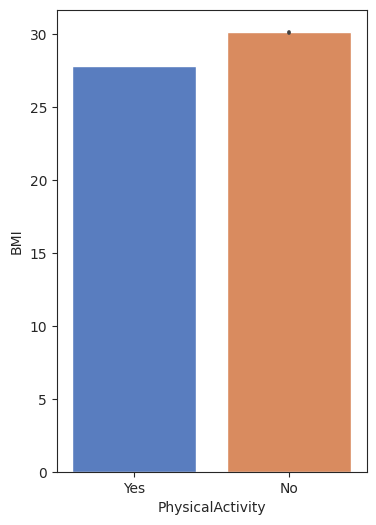

In [19]:
sns.barplot(data = df, x = "PhysicalActivity", y = "BMI", palette = "muted")
plt.gcf().set_size_inches(4, 6) # Define o tamanho da figura

plt.show()

Dentre os BMI's, as pessoas que não praticam atividade física regularmente e tiveram problema no coração têm as piores saúdes gerais.

O gráfico demonstra que existe uma possível relação: As pessoas que não praticam atividade física regularmente possuem maiores índices de BMI.








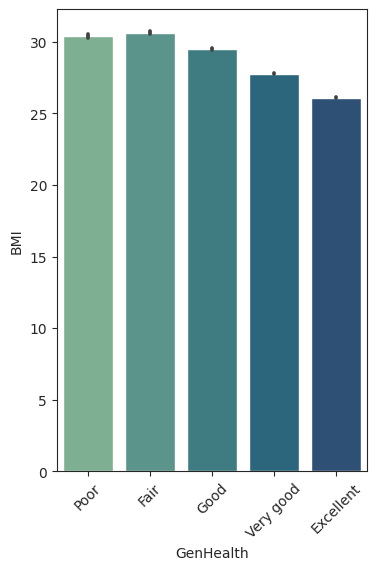

In [20]:
sns.barplot(data = df, x = "GenHealth", y = "BMI", palette = 'crest', alpha = 1, order = ["Poor", "Fair", "Good", "Very good", "Excellent"])
plt.gcf().set_size_inches(4, 6) # Define o tamanho da figura
plt.xticks(rotation=45)
plt.show()

O gráfico mostra a relação entre o BMI e a saúde geral, demonstrando que pessoas com o BMI menor tende a possuir uma saúde geral melhor

#### Gráficos de dispersão + aplicação de regressão linear

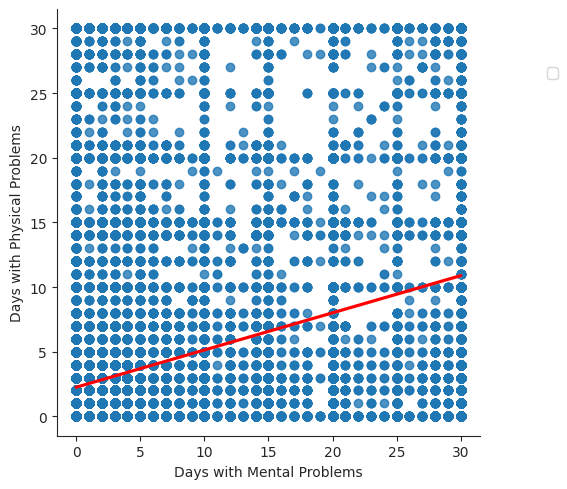

In [21]:
sns.lmplot(data = df, x = "MentalHealth", y = "PhysicalHealth", line_kws={'color': 'red'})
plt.legend(bbox_to_anchor = (1.2, 0.85), loc = 'right')
plt.xlabel("Days with Mental Problems")
plt.ylabel("Days with Physical Problems")
plt.show()



O gráfico mostra a relação de problemas de saúde física e saúde mental (dias)
a coloração do gráfico está de acordo com o General Health, indicando a saúde geral (1 = mais baixa, 5 = mais alta).

É possível perceber que a saúde física impacta mais na saúde geral, mas a saúde física e mental estão relacionadas entre si.

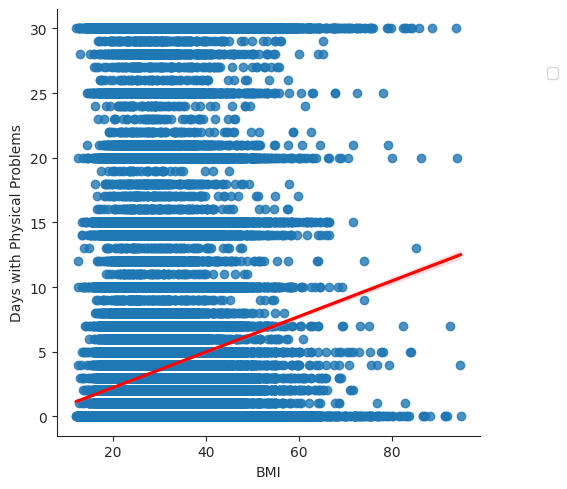

In [22]:
sns.lmplot(data = df, x = "BMI", y = "PhysicalHealth", line_kws={'color': 'red'})
plt.legend(bbox_to_anchor = (1.2, 0.85), loc = 'right')
plt.xlabel("BMI")
plt.ylabel("Days with Physical Problems")
plt.show()

# Resposta das perguntas

##COMO AS VARIÁVEIS INFLUENCIAM NUMA DOENÇA CARDÍACA

####Avaliando as variáveis em relação aos problemas cardíacos

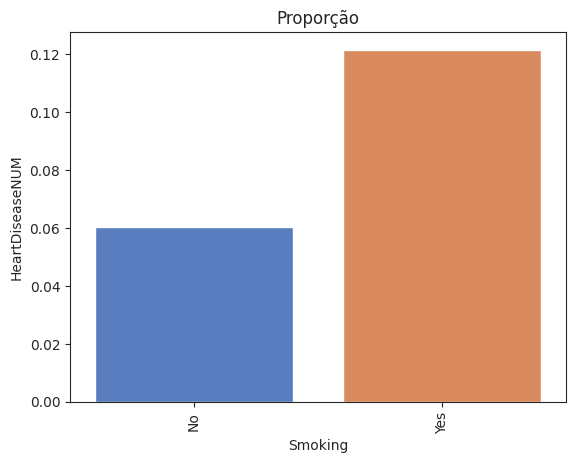

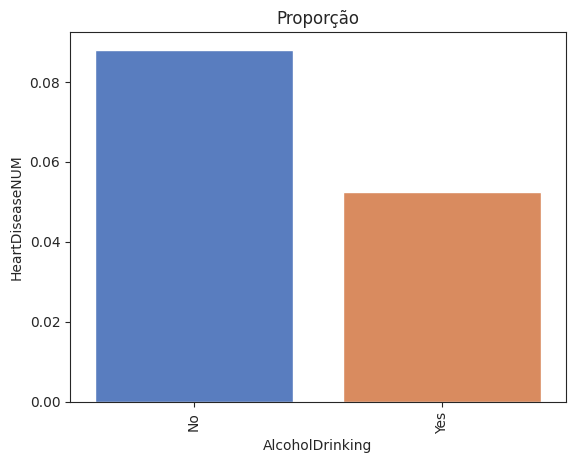

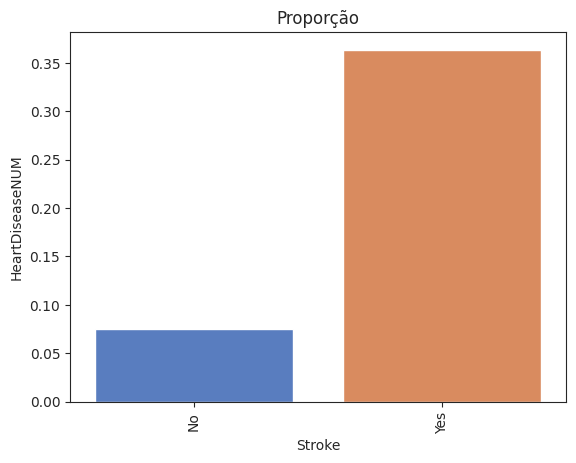

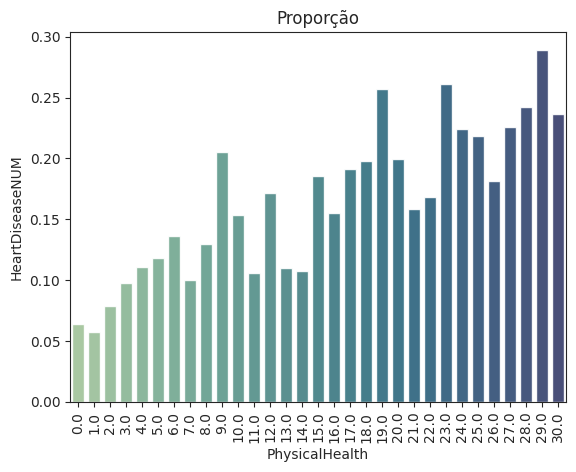

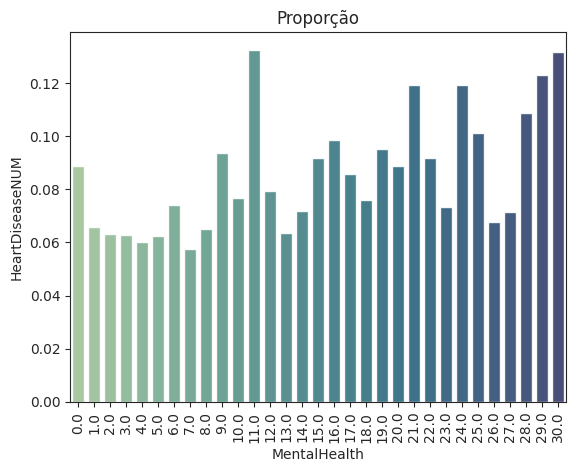

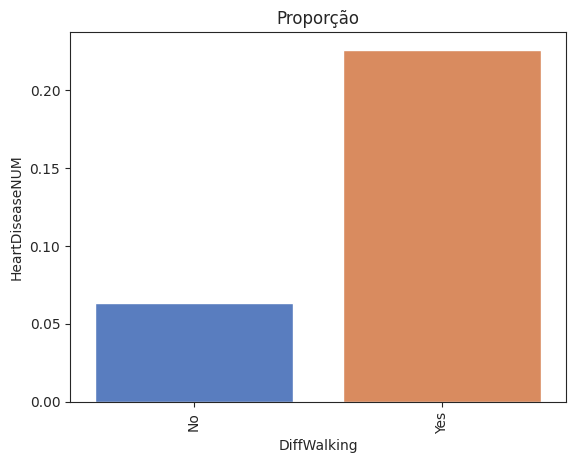

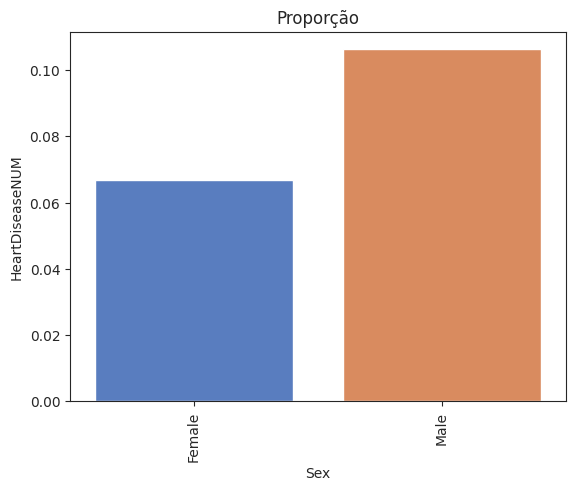

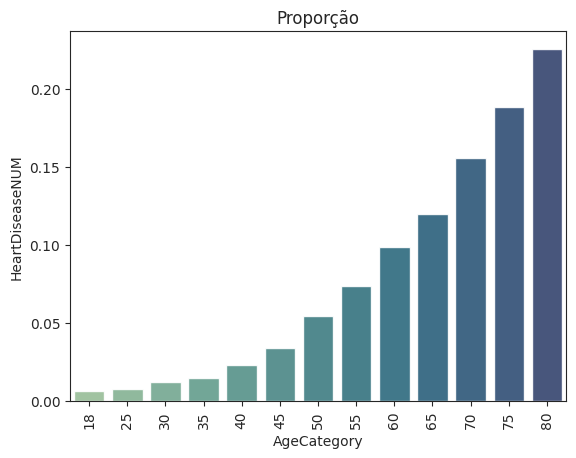

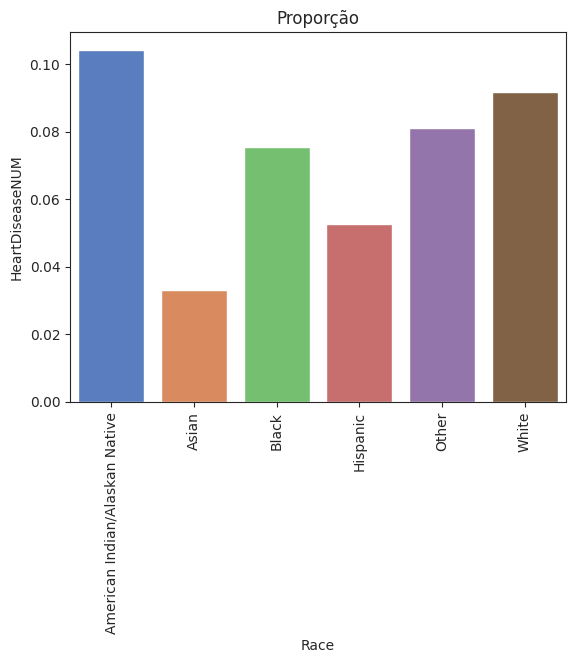

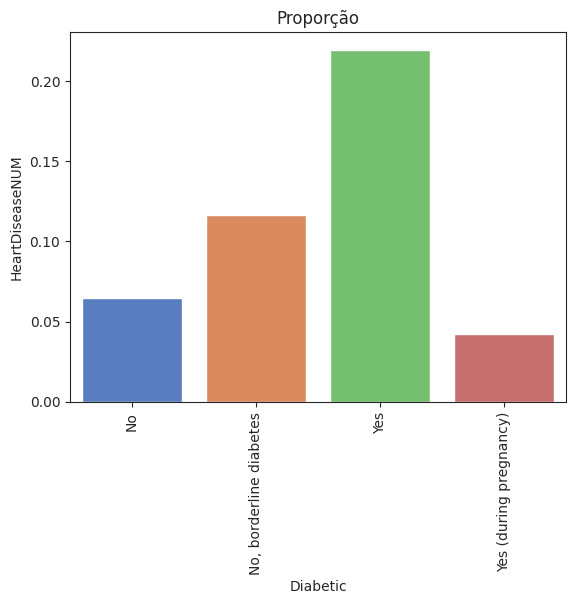

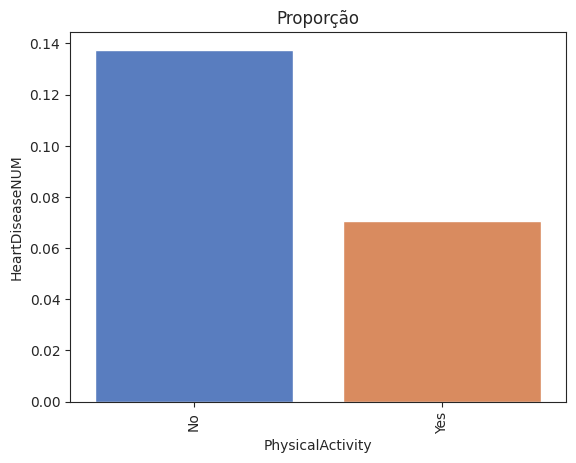

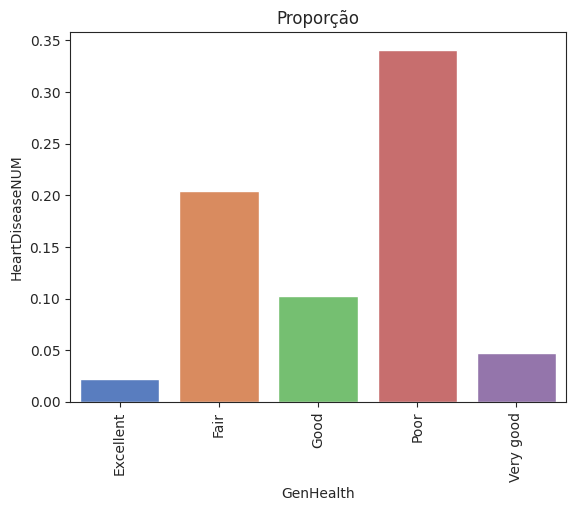

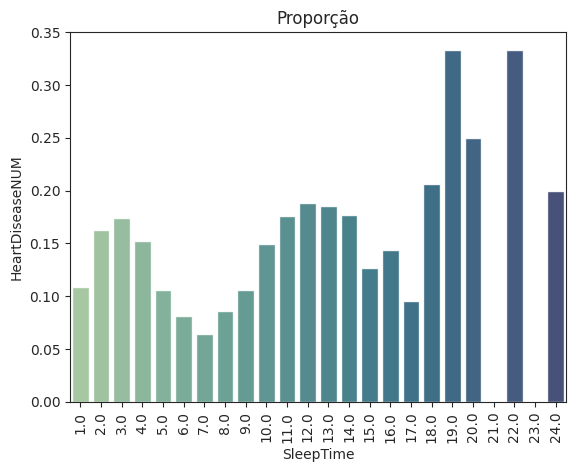

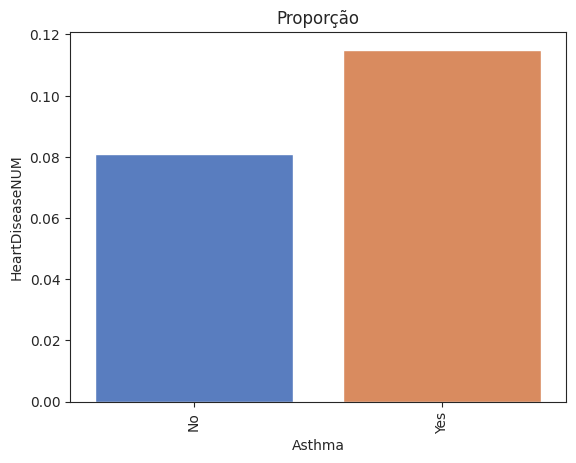

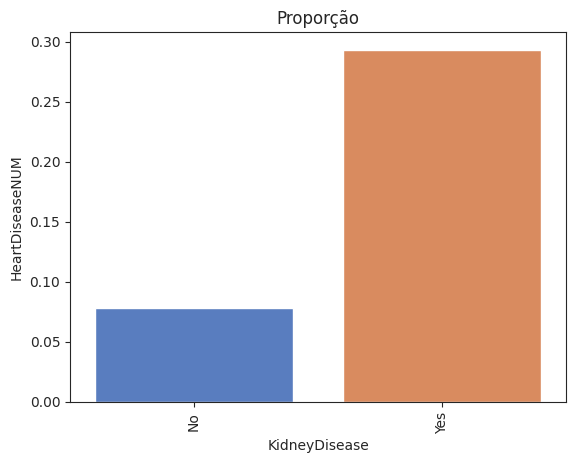

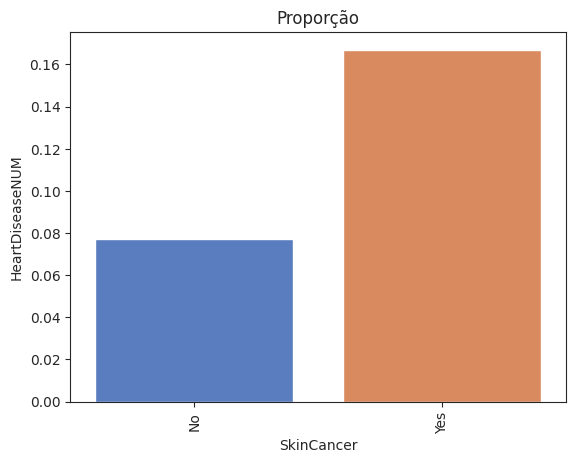

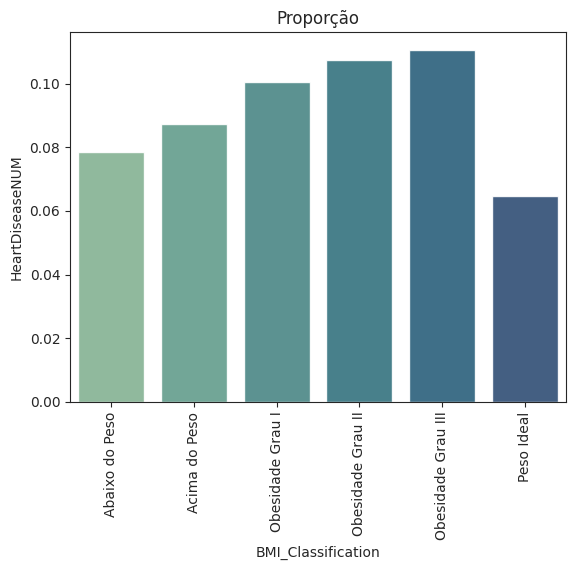

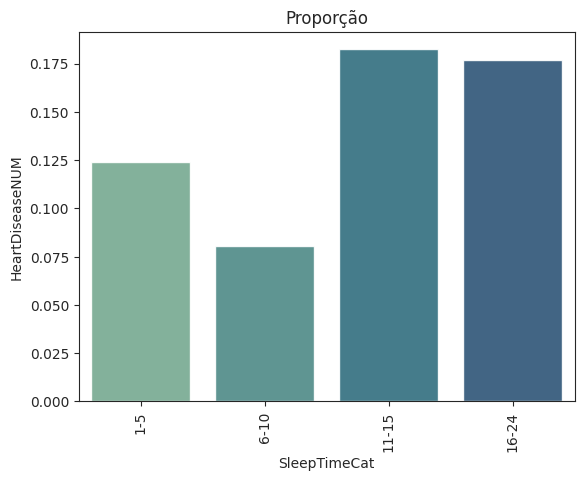

In [40]:
for i in df:
  if 'NUM' not in i and 'num' not in i and i != 'HeartDisease' and i != 'BMI':
    if i != 'PhysicalHealth' and i != 'MentalHealth' and i != 'AgeCategory' and i != 'SleepTime' and i != 'BMI_Classification' and i != 'SleepTimeCat':
      proporcao2 = df.groupby(i)['HeartDiseaseNUM'].mean()
      sns.barplot(data = proporcao2.reset_index(), x = i, y='HeartDiseaseNUM', palette = 'muted')
      plt.title('Proporção')
      plt.xticks(rotation = 90)
      plt.show()
    else:
      proporcao2 = df.groupby(i)['HeartDiseaseNUM'].mean()
      sns.barplot(data = proporcao2.reset_index(), x = i, y='HeartDiseaseNUM', palette = 'crest', alpha = 0.9)
      plt.title('Proporção')
      plt.xticks(rotation = 90)
      plt.show()

Aqui podemos observar que várias variáveis aparentam ter relação com os problemas cardíacos.
Algumas já são esperadas, como o ato de fumar e não praticar atividades físicas, mas outras variáveis apresentaram ter uma possível relação improváveis, como o caso do câncer de pele. Porém, alguns casos provavelmente são apenas relações que não implicam causa.


<Axes: xlabel='Sex', ylabel='count'>

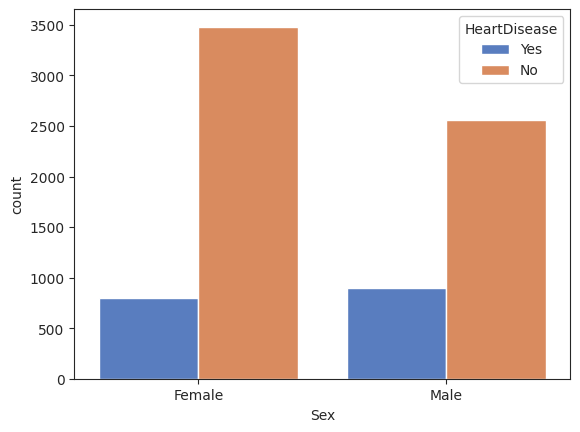

In [38]:
df_novo6 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

sns.countplot(data = df_novo6, x = 'Sex', hue = 'HeartDisease', palette = 'muted')

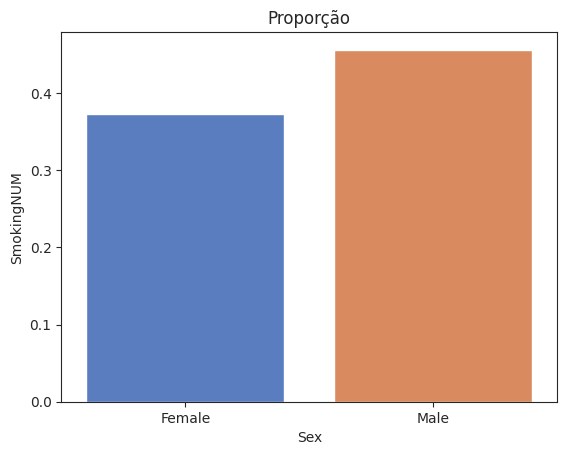

In [39]:
proporcao = df.groupby('Sex')['SmokingNUM'].mean()
sns.barplot(data = proporcao.reset_index(), x = 'Sex', y = 'SmokingNUM', palette = 'muted')
plt.title('Proporção')
plt.show()

####Avaliando outras combinações

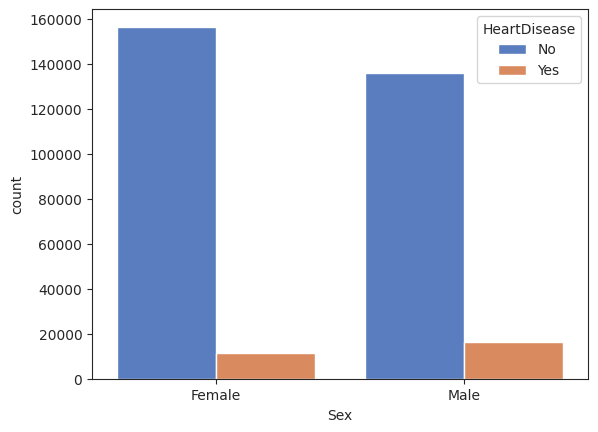

In [24]:
# Relação de gênero e problemas no coração
sns.countplot(data = df, x = "Sex", hue = 'HeartDisease', palette = 'muted')
plt.show()

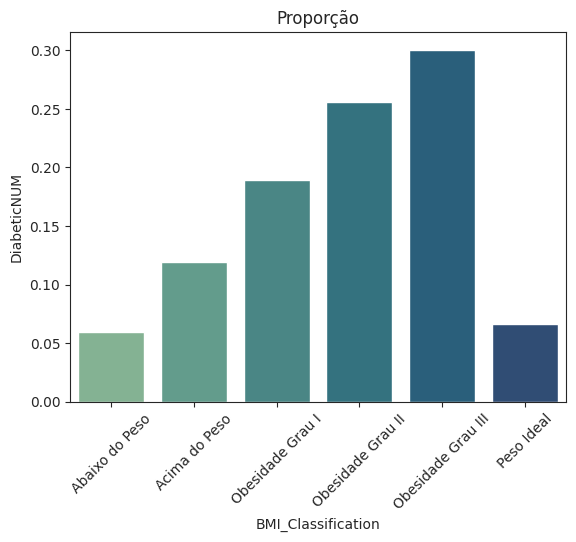

In [25]:
proporcao = df.groupby('BMI_Classification')['DiabeticNUM'].mean()
sns.set_palette("muted")
sns.barplot(data = proporcao.reset_index(), x = 'BMI_Classification', y='DiabeticNUM', palette = 'crest')
plt.title('Proporção')
plt.xticks(rotation = 45)
plt.show()

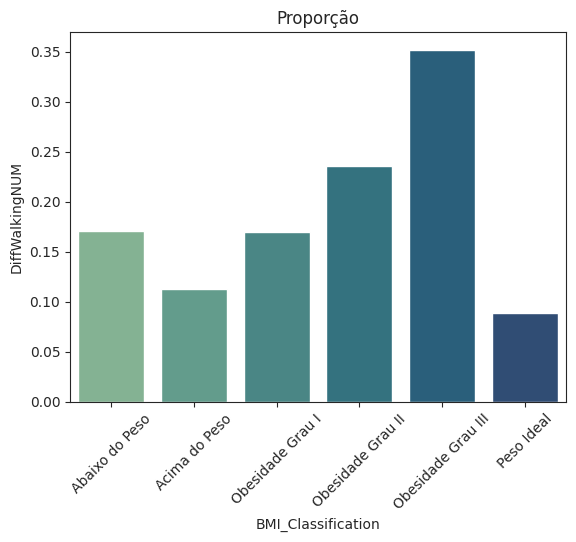

In [26]:
proporcao = df.groupby('BMI_Classification')['DiffWalkingNUM'].mean()
sns.barplot(data = proporcao.reset_index(), x = 'BMI_Classification', y = 'DiffWalkingNUM', palette = 'crest')
plt.title('Proporção')
plt.xticks(rotation = 45)
plt.show()

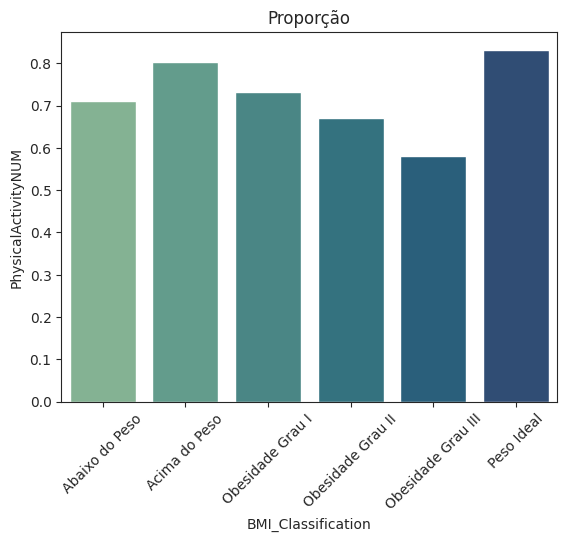

In [27]:
proporcao = df.groupby('BMI_Classification')['PhysicalActivityNUM'].mean()
sns.barplot(data = proporcao.reset_index(), x = 'BMI_Classification', y = 'PhysicalActivityNUM', palette = 'crest')
plt.title('Proporção')
plt.xticks(rotation = 45)
plt.show()

## COMO A RAÇA E O SEXO PODE INFLUENCIAR

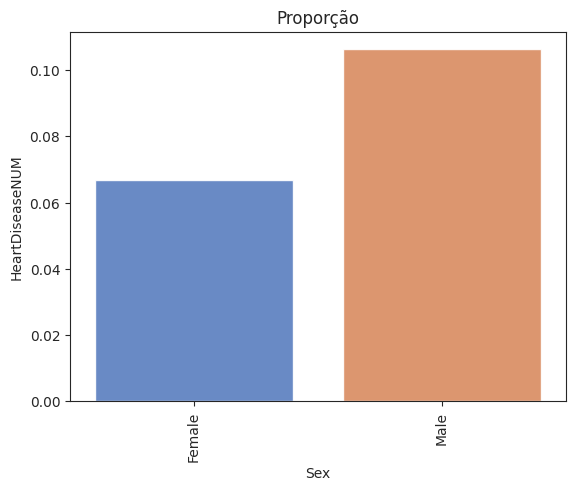

In [41]:
proporcao2 = df.groupby('Sex')['HeartDiseaseNUM'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Sex', y='HeartDiseaseNUM', palette = 'muted', alpha = 0.9)
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Nesse caso acima podemos ver que o sexo aparenta ter relação com as doenças cardíacas, e realmente existem estudos que apontam esse fato: homens possui maiores relação com problemas cardíacos.

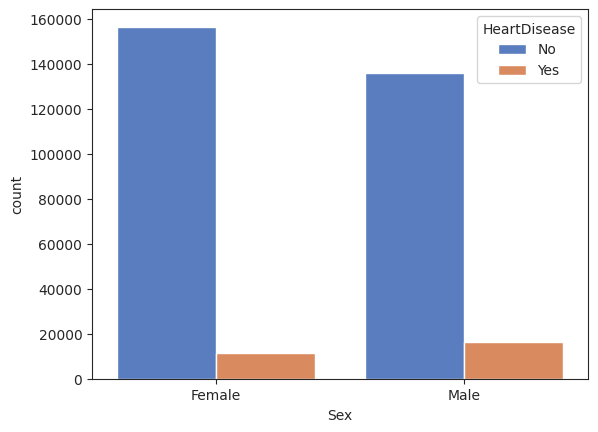

In [42]:
# Relação de gênero e problemas no coração
sns.countplot(data = df, x = "Sex", hue = 'HeartDisease', palette = 'muted')
plt.show()

Nesse gráfico é possível ter a mesma conclusão, mas utilizando a própria contagem de dados.
mesmo com um número maior de mulheres na base de dados, o número de homens com problemas cardíacos superam o número de mulheres com o mesmo problema.

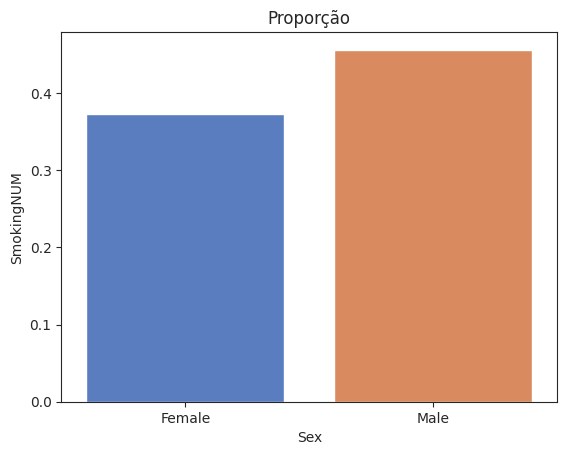

In [43]:
proporcao = df.groupby('Sex')['SmokingNUM'].mean()
sns.barplot(data = proporcao.reset_index(), x = 'Sex', y = 'SmokingNUM', palette = 'muted')
plt.title('Proporção')
plt.show()

Uma das conclusões que tiramos é que o hábito de fumar contribui para o aparecimento de doenças cardíacas, com base nos dados achados e por estados científicos. Com isso, vimos na base que homens em média tendem a fumar mais que a mulheres, e isso pode ser um dos fatores para ser mais alta a taxa de problemáticos cardíacos.

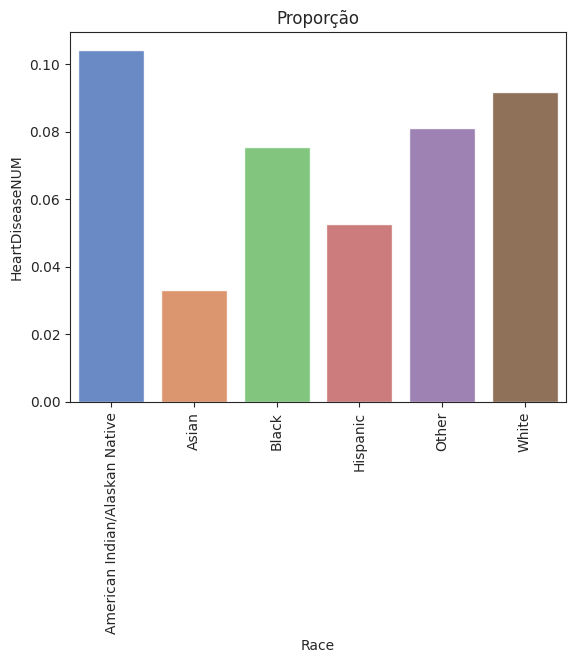

In [44]:
proporcao2 = df.groupby('Race')['HeartDiseaseNUM'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='HeartDiseaseNUM', palette = 'muted', alpha = 0.9)
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Podemos ver a relação de algumas raças com problemas cardíacos, os American Indian / Alaskan Native possuem maiores taxas, juntamente com os brancos. Além disso, é possível perceber que os asiáticos possuem as menores taxas.

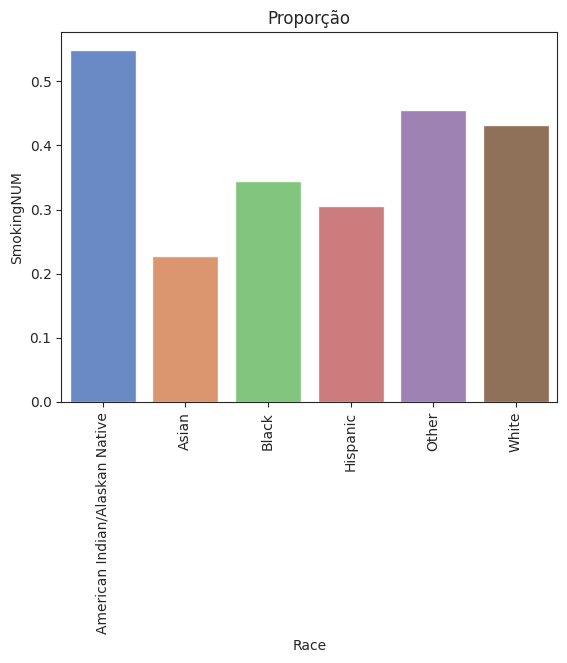

In [45]:
proporcao2 = df.groupby('Race')['SmokingNUM'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='SmokingNUM', palette = 'muted', alpha = 0.9)
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Quando comparamos as raças em relação ao tavagismo, encontramos novamente os brancos e "American Indian / Alaskan Native" entre os maiores índices, juntamente agora com outras raças. Além disso, os asiáticos possuem novamente as menores taxas.

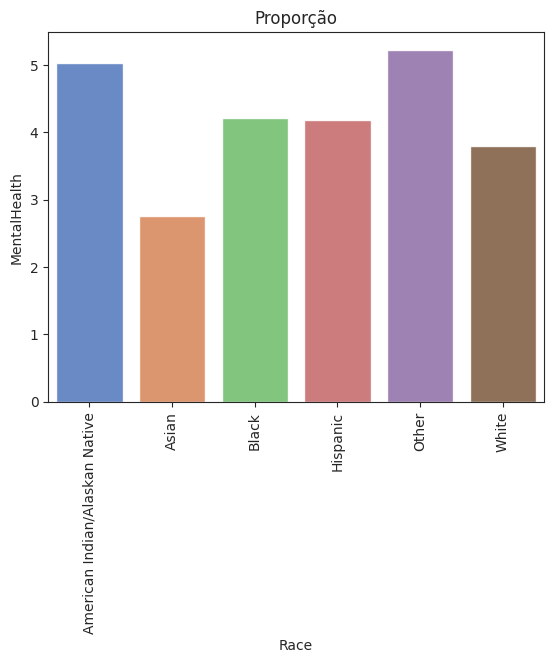

In [46]:
proporcao2 = df.groupby('Race')['MentalHealth'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='MentalHealth', palette = 'muted', alpha = 0.9)
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Combinando outras variáveis podemos ver que os asiáticos novamente possuem os menores índices, dessa vez avaliando dias com problemas de saúde mental, eles possuem a menor média.

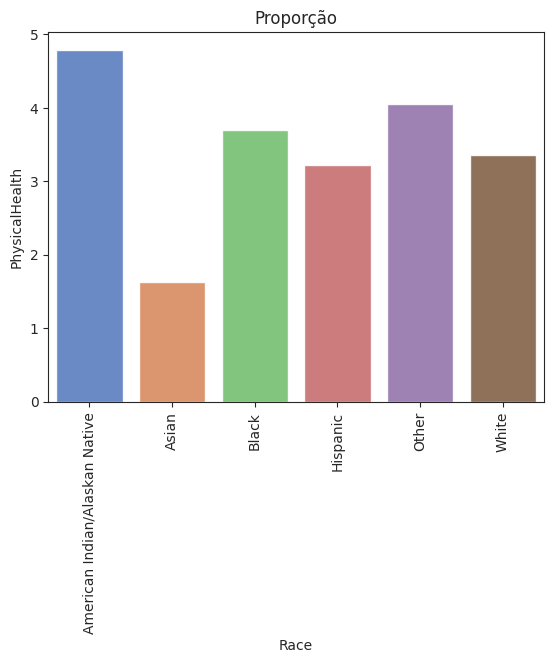

In [47]:
proporcao2 = df.groupby('Race')['PhysicalHealth'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='PhysicalHealth', palette = 'muted', alpha = 0.9)
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Combinando a variável de dias com problemas físicos podemos ver que os asiáticos novamente possuem os menores índices.


De forma geral, essas análises com raças mostraram que os "American Indian / Alaskan Native" possuem as piores taxas, incluindo problemas cardíacos e os asiáticos ficaram com as melhores taxas.

##COMO OS HABITOS E FATORES NÃO CONTROLÁVEIS INFLUENCIAM NUMA DOENÇA CARDÍACA + COMBOS DE VARIÁVEIS

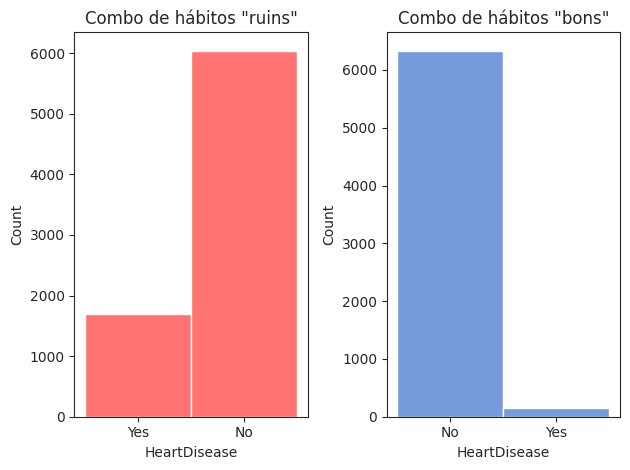

In [48]:
df_novo = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

df_novo2 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]

plt.subplot(1, 2, 1)
sns.histplot(data=df_novo, x='HeartDisease', alpha=0.55, color = 'red')
plt.title('Combo de hábitos "ruins"')

plt.subplot(1, 2, 2)
sns.histplot(data=df_novo2, x='HeartDisease')
plt.title('Combo de hábitos "bons"')

plt.tight_layout()
plt.show()

Avaliando combos de hábitos "ruins" e "bons" podemos perceber que as pessoas que possuem hábitos "bons" possuem um número consideravelmente menor de problématicos cardíacos, demonstrando que os hábitos influenciam muito na doença.

<Axes: xlabel='Sex', ylabel='count'>

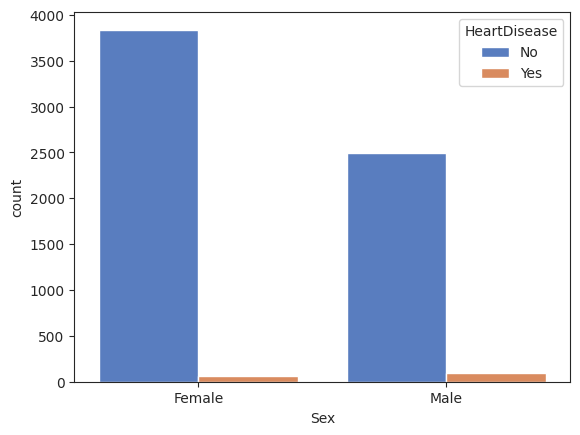

In [49]:
df_novo5 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]

sns.countplot(data = df_novo5, x = 'Sex', hue = 'HeartDisease', palette = 'muted')

Nesse gráfico comparamos os hábitos "bons" e a sua contagem pelo sexo.
Podemos perceber que a maioria contém mulheres, mas mesmo assim os homens possuem maiores taxas de problemáticos cardíacos.

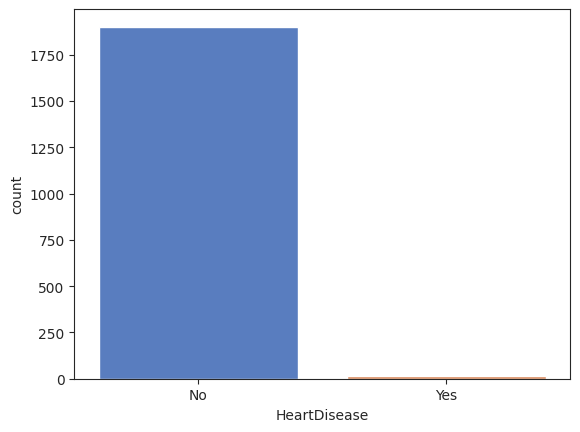

In [50]:
df_novo3 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalHealth'] <= 5) &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9) &
             (df['Stroke'] == 'No') &
             (df['DiffWalking'] == 'No') &
             (df['DiabeticNUM'] == 0) &
             (df['GenHealthNUM'] >= 3) &
             (df['Asthma'] == 'No') &
             (df['KidneyDisease'] == 'No') &
             (df['SkinCancer'] == 'No') &
             (df['BMI_Classification_NUM'] < 3)]

sns.countplot(data = df_novo3, x = 'HeartDisease', palette = 'muted')
plt.show()

Nesse caso relacionamos várias variáveis que foram positivas nas análises e contamos aqueles que possuem e não possuem doença cardíaca.
É possível ver que tiveram pouquíssimas pessoas com problema.

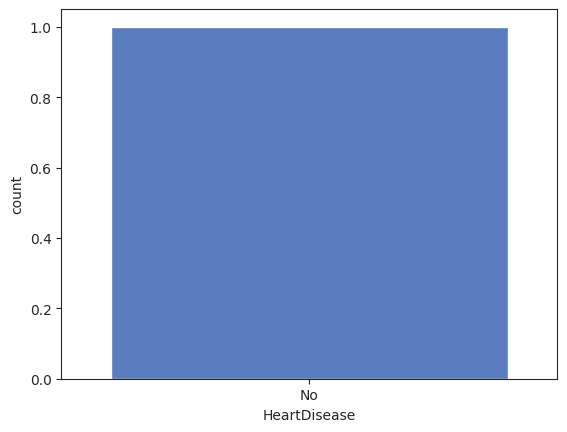

In [51]:
df_novo4 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalHealth'] > 5) &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9)) &
             (df['Stroke'] == 'Yes') &
             (df['DiffWalking'] == 'Yes') &
             (df['Sex'] == 'Male') &
             (df['DiabeticNUM'] == 1) &
             (df['GenHealthNUM'] < 3) &
             (df['Asthma'] == 'Yes') &
             (df['KidneyDisease'] == 'Yes') &
             (df['SkinCancer'] == 'Yes') &
             (df['BMI_Classification_NUM'] > 3)]

sns.countplot(data = df_novo4, x = 'HeartDisease', palette = 'muted')
plt.show()

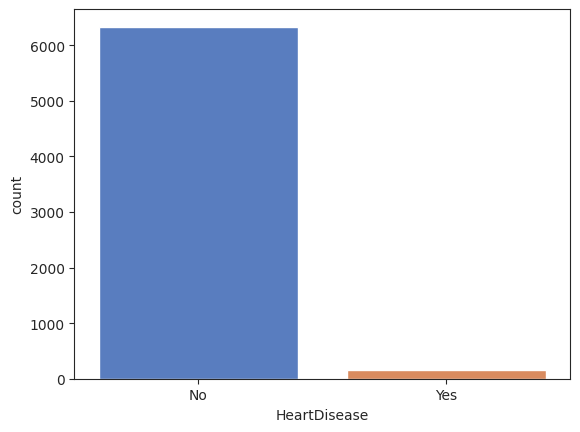

In [59]:
df_novo2 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]

sns.countplot(data = df_novo2, x = 'HeartDisease', palette = 'muted')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

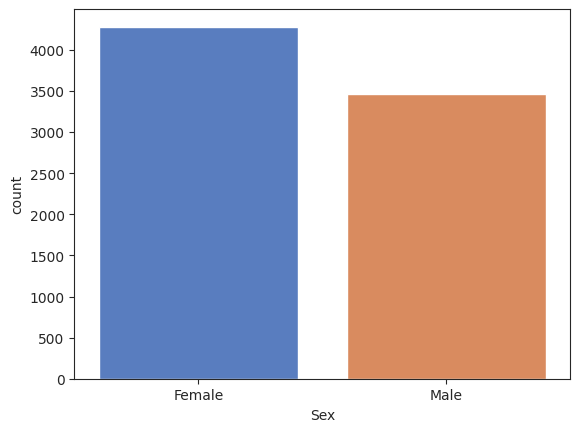

In [60]:
df_novo6 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

sns.countplot(data = df_novo6, x = 'Sex', palette = 'muted')

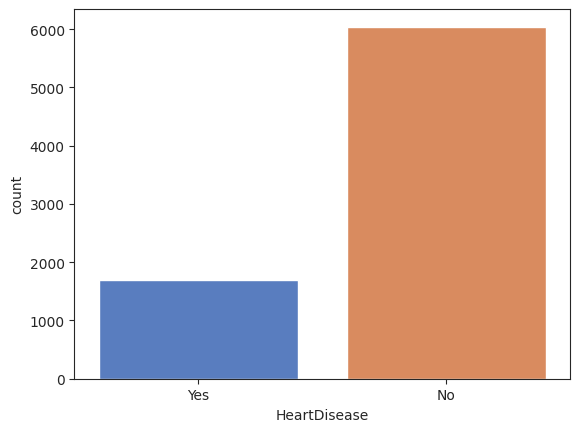

In [61]:
df_novo2 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

sns.countplot(data = df_novo2, x = 'HeartDisease', palette = 'muted')
plt.show()

Nesse gráfico separamos as variáveis mais negativos e vimos que apenas uma pessoa possui, e não tem problema cardíaco.

##COMO O SONO IMPACTA NA SAÚDE DO INDIVÍDUO?

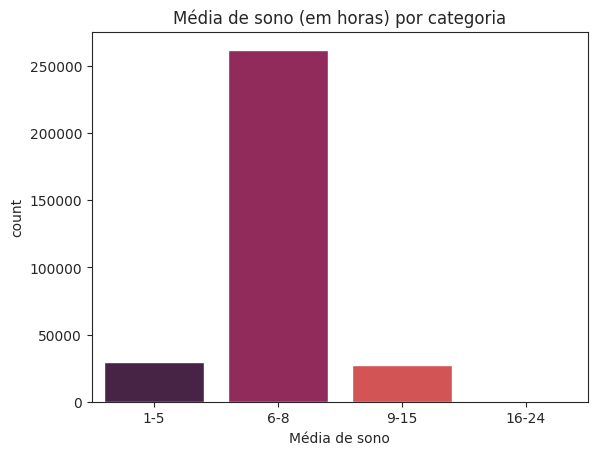

In [52]:
bins = [1, 5, 8, 15, 24]
labels = ['1-5', '6-8', '9-15', '16-24']

sns.countplot(x = pd.cut(df['SleepTime'], bins=bins, labels=labels), palette = 'rocket')
plt.title('Média de sono (em horas) por categoria')
plt.xlabel('Média de sono')
plt.show()

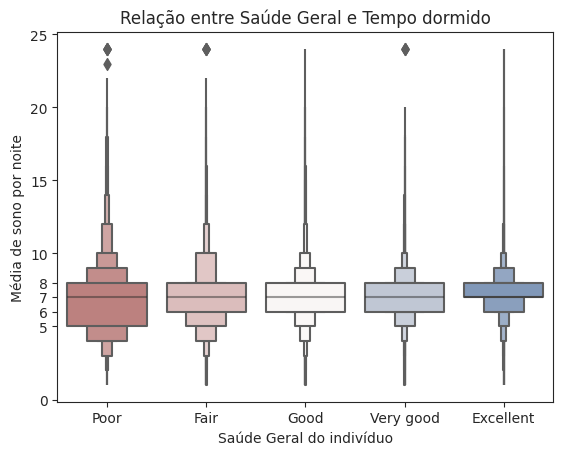

In [53]:
sns.boxenplot(data = df, y = 'SleepTime', x = 'GenHealth', palette = 'vlag_r', order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.yticks([0, 5, 6, 7, 8, 10, 15, 20, 25])
plt.xlabel('Saúde Geral do indivíduo')
plt.ylabel('Média de sono por noite')
plt.title('Relação entre Saúde Geral e Tempo dormido')
plt.show()

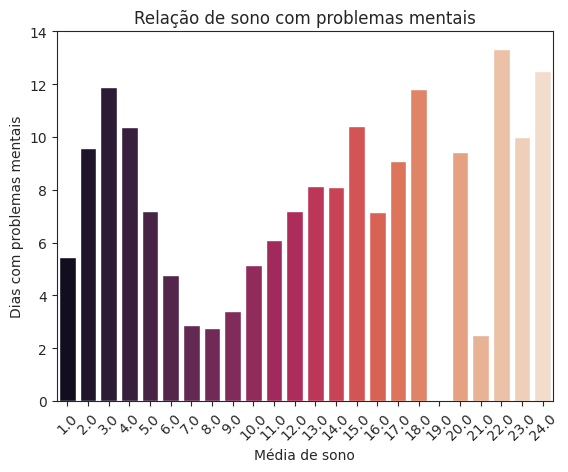

In [54]:

SleepTime_proportion = df.groupby('SleepTime')['MentalHealth'].mean()

sns.barplot(data = SleepTime_proportion.reset_index(), x = 'SleepTime', y='MentalHealth', palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Média de sono')
plt.ylabel('Dias com problemas mentais')
plt.title('Relação de sono com problemas mentais')

plt.show()

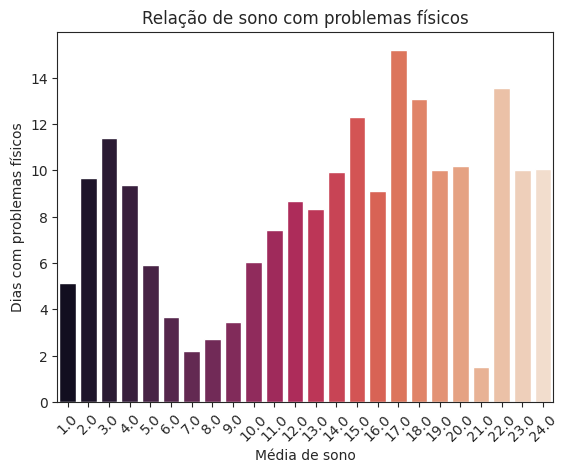

In [55]:
SleepTime_proportion2 = df.groupby('SleepTime')['PhysicalHealth'].mean()

sns.barplot(data = SleepTime_proportion2.reset_index(), x = 'SleepTime', y='PhysicalHealth', palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Média de sono')
plt.ylabel('Dias com problemas físicos')
plt.title('Relação de sono com problemas físicos')

plt.show()

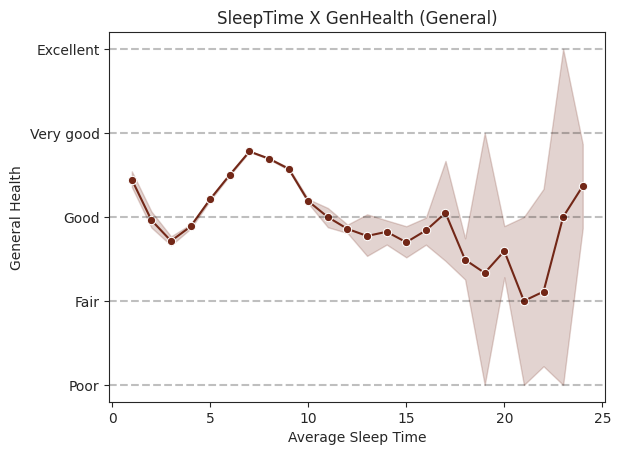

In [56]:
sns.lineplot(x = df["SleepTime"], y = df["GenHealthNUM"], marker='o', color = '#722717')

plt.title('SleepTime X GenHealth (General)')
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.yticks([1, 2, 3, 4, 5], xtick_labels)

plt.ylabel("General Health")
plt.xlabel("Average Sleep Time")

for i in range(1, 6):
    plt.axhline(y=i, linestyle='--', color='black', alpha = 0.25)

plt.show()

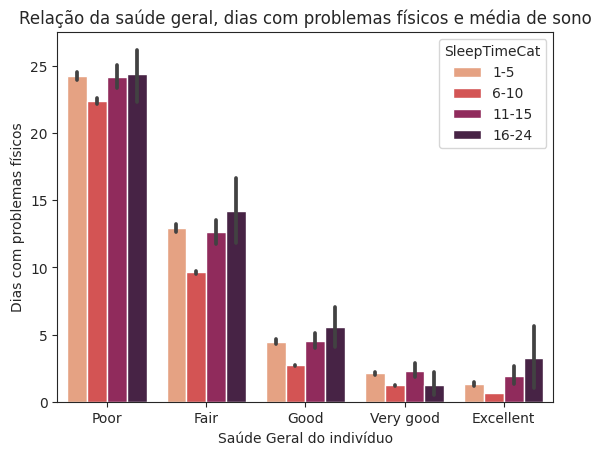

In [57]:
sns.barplot(data=df, x="GenHealth", y="PhysicalHealth", hue="SleepTimeCat", palette="rocket_r", order = ["Poor", "Fair", "Good", "Very good", "Excellent"])
plt.xlabel('Saúde Geral do indivíduo')
plt.ylabel('Dias com problemas físicos')
plt.title('Relação da saúde geral, dias com problemas físicos e média de sono')
plt.show()

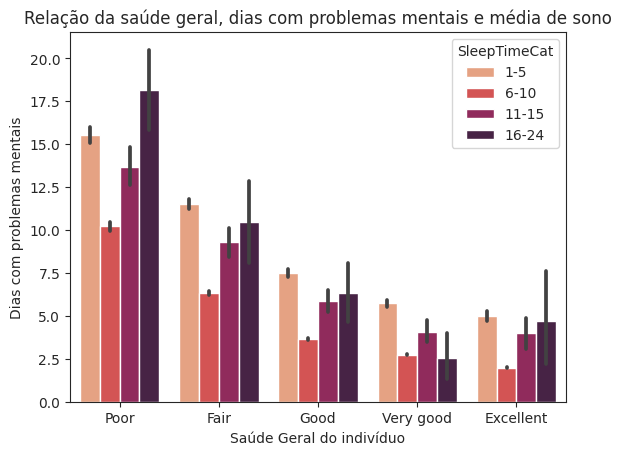

In [58]:

sns.barplot(data=df, x="GenHealth", y="MentalHealth", hue="SleepTimeCat", palette="rocket_r", order = ["Poor", "Fair", "Good", "Very good", "Excellent"])
plt.xlabel('Saúde Geral do indivíduo')
plt.ylabel('Dias com problemas mentais')
plt.title('Relação da saúde geral, dias com problemas mentais e média de sono')
plt.show()

#CONCLUSÃO:

RESULTADOS ENCONTRADOS:

Com o estudo da base de dados, conseguimos compreender como vários fatores impactam na saúde de um indivíduo:

- Observamos que o sexo e raça aparentam ter relação com problemas cardíacos;
- A saúde física e mental estão relacionadas entre si;
- Muitos fatores podem influenciam problemas no coração, como o IMC, problemas no rim, falta de atividade física e outros fatores;
- O sono possui um papel importante na saúde;
- Os hábitos pessoais possuem grande impacto na saúde cardíaca.

LIMITAÇÕES:
- Alguns dados aparentam ser irreais, logo inconclusivos, como o SleepTime (média de sono por noite) de mais de 20 horas e pessoas de BMI's altíssimos mas sem problemas físicos (como dificuldade de andar).
- São muitas variáveis e não foi possível fazer uma análise pontual e completa.

MELHORIAS POSSÍVEIS:
- Tratar os dados que aparentam ser falsos (parte dos outliers)
- Realizar mais relações gráficas para melhor análise
- Implementar ferramentas estatísticas para mais conclusões precisas.

TRABALHOS FUTUROS:
- Há uma possibilidade de implementação de machine learning na base de dados para predição e diagnóstico.